We read the libraries necessary to analyze our data.

In [2]:
library(tidyverse)
library(repr)
library(caret)
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



We read the data set into r. It is stored in the same folder as this file. 

In [28]:
train_data <- read_excel("Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls", sheet = 2)

know_training_data <- train_data %>%
select("STG", "SCG","STR", "LPR", "PEG", "UNS")%>%
mutate(UNS = as.factor(UNS))

head(know_training_data)

New names:
* `` -> ...7
* `` -> ...8


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


In [29]:
test_data <- read_excel("Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls", sheet = 3)

know_test_data <- test_data %>%
select("STG", "SCG","STR", "LPR", "PEG", "UNS")%>%
mutate(UNS = as.factor(UNS))

head(know_test_data)

New names:
* `` -> ...7
* `` -> ...8


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
0.20,0.20,0.68,0.67,0.85,High
0.22,0.22,0.90,0.30,0.90,High
0.14,0.14,0.70,0.50,0.30,Low


In [31]:
data_description <- read_excel("Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls", sheet = 1)

data_description

New names:
* `` -> ...2


Data Set Characteristics: Multivariate,...2,Attribute Information:
<chr>,<lgl>,<chr>
Number of Instances: 403,NA,"STG (The degree of study time for goal object materails),"
Area: Education,NA,SCG (The degree of repetition number of user for goal object materails)
Attribute Characteristics: Real,NA,STR (The degree of study time of user for related objects with goal object)
Number of Attributes: 5,NA,LPR (The exam performance of user for related objects with goal object)
Associated Tasks: Classification,NA,PEG (The exam performance of user for goal objects)
NA,NA,UNS (The knowledge level of user)
Class Distribution,NA,NA
Very Low: 50,NA,NA
Low:129,NA,NA


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


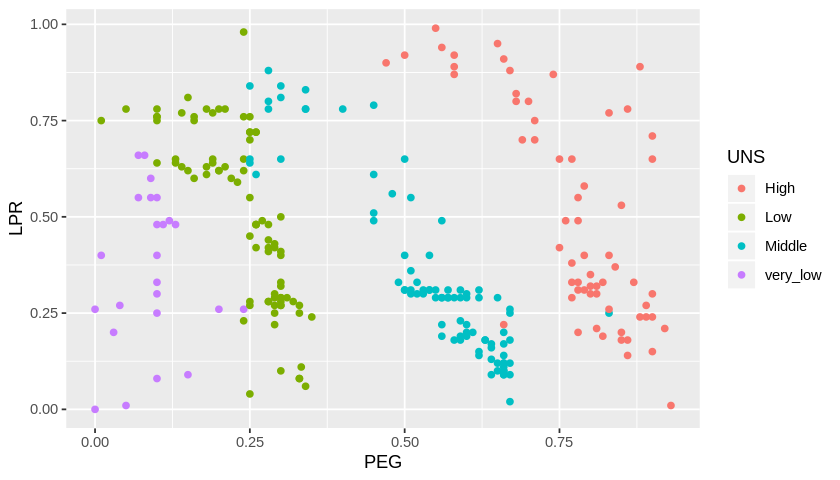

In [32]:
options(repr.plot.height = 4)
head(know_training_data)
know_gg <- know_training_data %>%
        ggplot(aes(x = PEG, y = LPR, color = UNS)) +
        geom_point()

know_gg

- Preliminary exploratory data analysis:

- Demonstrate that the dataset can be read from the web into R 

- Split your data into a training and test set

- Using only the training set, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 

- Using only the training set, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis (ggpairs from the GGally R package can be helpful here).

In [48]:
# find correlations 
know_training_data_less <- know_training_data %>%
select(-"UNS")

correlation_table <- cor(know_training_data_less)

correlation_table

,STG,SCG,STR,LPR,PEG
STG,1.00000000,0.08103471,0.04084123,0.09954270,0.2063592
SCG,0.08103471,1.00000000,0.08373209,0.09781558,0.1827923
STR,0.04084123,0.08373209,1.00000000,0.03648104,0.1207791
LPR,0.09954270,0.09781558,0.03648104,1.00000000,-0.2695742
PEG,0.20635924,0.18279233,0.12077914,-0.26957423,1.0000000


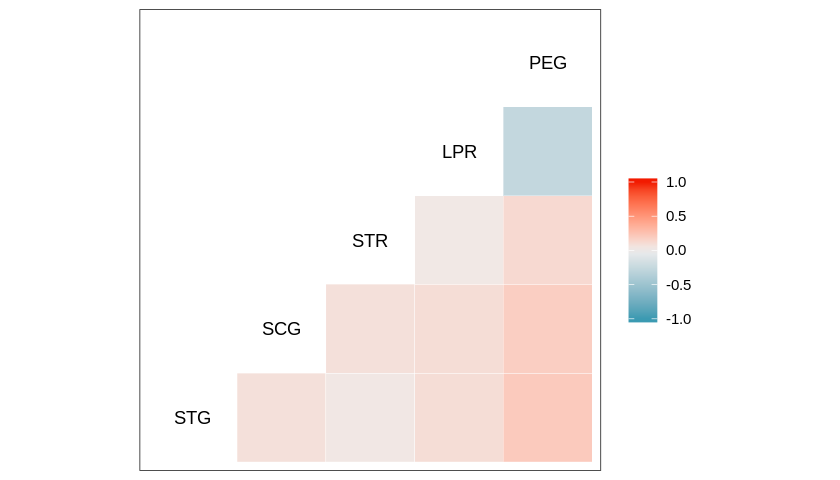

In [63]:
options(repr.plot.height = 4)
library(GGally)
ggcorr(know_training_data_less, method = c("everything", "pearson"))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


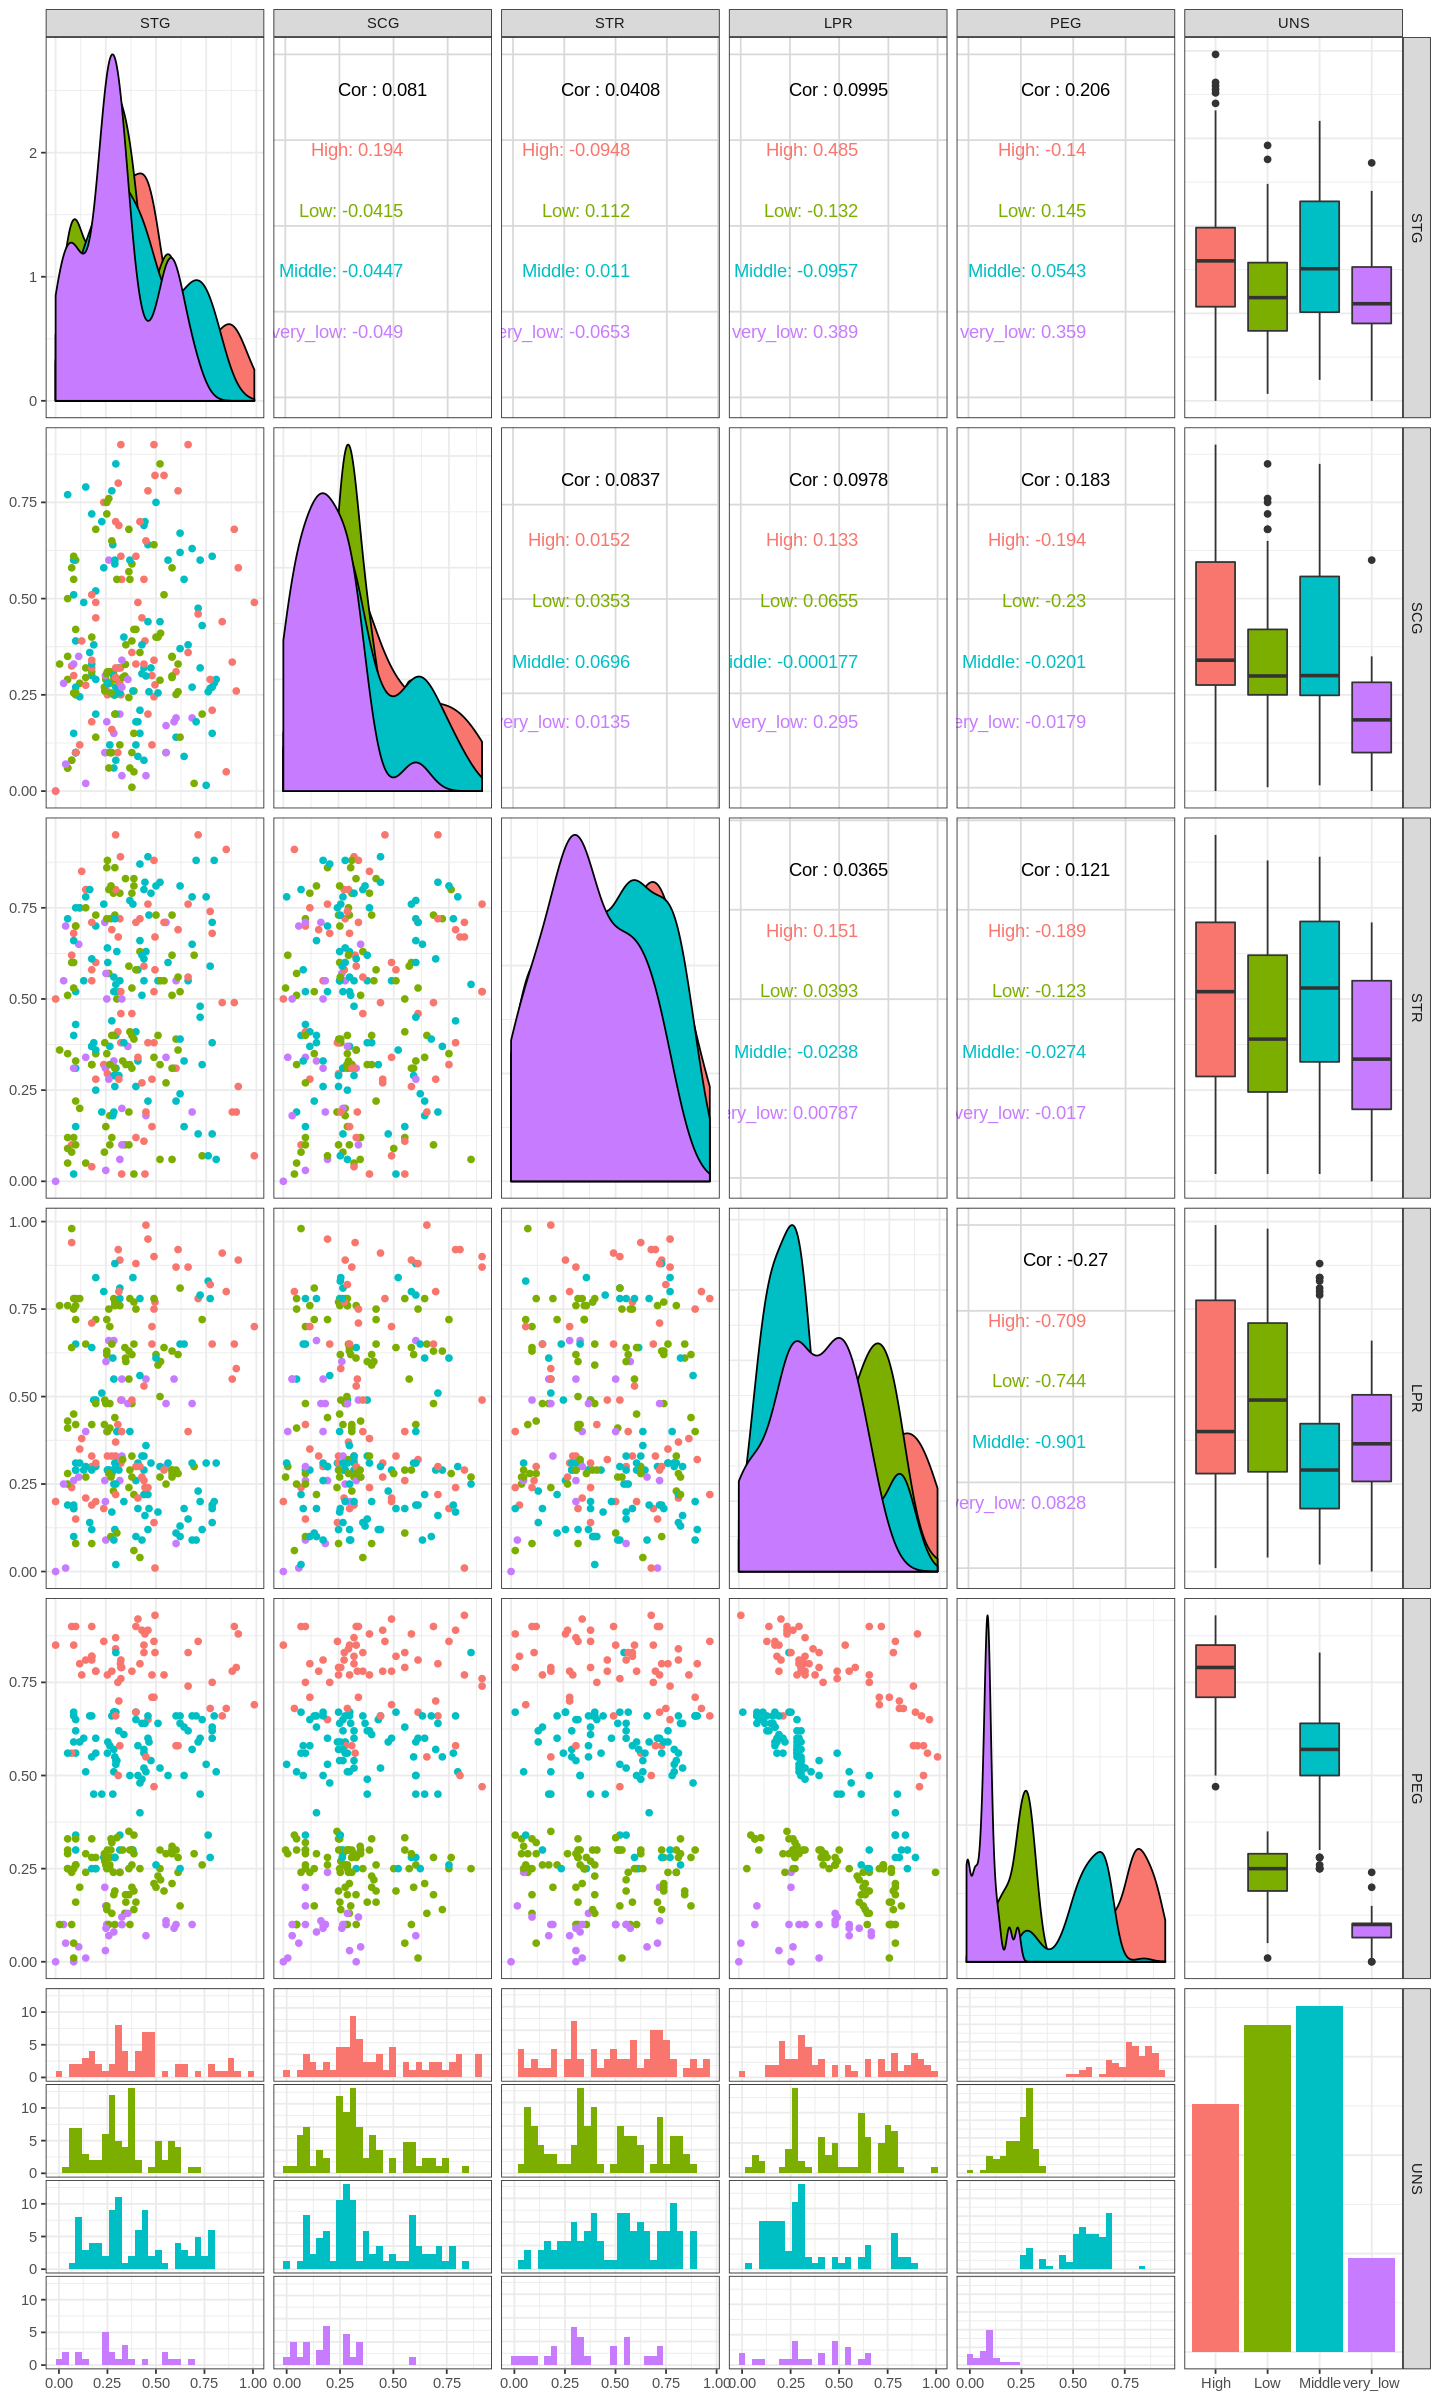

In [67]:
options(repr.plot.height = 20, repr.plot.width = 12)
ggpairs(know_training_data, columns = 1:6, ggplot2::aes(colour=UNS)) 